# Analysis of Historical S&P prices

### Dec 29, 1927 - Present
#### https://www.wsj.com/market-data/quotes/index/SPX/historical-prices

#### Windows commands for working dashboard
python -m venv path\to\myenv

cd path\to\myenv

Scripts\activate.bat

##### Dashboard setup

In [66]:
import panel as pn
pn.extension('tabulator')
import hvplot.pandas

##### Reading Data

In [73]:
import pandas as pd

df_uncleaned = pd.read_csv('HistoricalPrices.csv')
df_uncleaned.head()

,Date,Open,High,Low,Close
0,11/30/22,3957.64,4080.11,3938.58,4080.11
1,11/29/22,3964.19,3976.77,3937.65,3957.63
2,11/28/22,4005.36,4012.27,3955.77,3963.94
3,11/25/22,4023.34,4034.02,4020.76,4026.12
4,11/23/22,4001.02,4033.78,3998.66,4027.26


#### Cleaning Data

In [74]:
import datetime

df = pd.DataFrame({"Month": [], "Day": [], "Year": [], "Day_Of_Week": [], "Avg_Daily_Cost": []})
df_uncleaned.columns = df_uncleaned.columns.str.replace(' ', '') # Clean bad col names
for i in range(len(df_uncleaned)):
    dt = df_uncleaned["Date"][i]
    month, day, year = (int(x) for x in dt.split('/'))
    if year < 50 and year >= 10:
        year = int("20" + str(year))
    elif year < 10 and year > 0:
        year = int("200" + str(year))
    elif year < 100 and year > 50:
        year = int("19" + str(year))
    else:
        year = 2000
    df.loc[i, "Month"] = month
    df.loc[i, "Day"] = day
    df.loc[i, "Year"] = year
    df.loc[i, "Day_Of_Week"] = int(datetime.datetime(year, month, day).weekday())
    df.loc[i, "Avg_Daily_Cost"] = (df_uncleaned.loc[i, "High"] + df_uncleaned.loc[i, "Low"]) / 2
df["Month"] = df["Month"].astype(int)
df["Day"] = df["Day"].astype(int)
df["Year"] = df["Year"].astype(int)
df["Day_Of_Week"] = df["Day_Of_Week"].astype(int)
df = pd.concat([df, df_uncleaned.iloc[:, 1:5]], axis = 1)
df.head()

,Month,Day,Year,Day_Of_Week,Avg_Daily_Cost,Open,High,Low,Close
0,11,30,2022,2,4009.345,3957.64,4080.11,3938.58,4080.11
1,11,29,2022,1,3957.210,3964.19,3976.77,3937.65,3957.63
2,11,28,2022,0,3984.020,4005.36,4012.27,3955.77,3963.94
3,11,25,2022,4,4027.390,4023.34,4034.02,4020.76,4026.12
4,11,23,2022,2,4016.220,4001.02,4033.78,3998.66,4027.26


##### Interactive implementation

In [ ]:
idf = df.interactive() # for interactive dashboard

In [160]:
year_slider = pn.widgets.IntSlider(name='Year slider', start = min(df.Year), end = max(df.Year), step = 1, value = min(df.Year))
#year_slider
yaxis_options = pn.widgets.CheckButtonGroup(
    name = "Y axis",
    options=["Open", "Avg_Daily_Cost", "Close"],
    button_type = 'success'
)
#yaxis_options
pipeline = (
    idf[
        (idf.Year <= year_slider)
    ]
    .groupby(['Year'])[yaxis_options].mean()
    .reset_index()
    .sort_values(by='Year')  
    .reset_index(drop=True)
)
#pipeline
source_bar_plot = pipeline.hvplot(kind='bar', 
                                  x='Year', 
                                  y=yaxis_options, 
                                  title='Trend by Year')
#source_bar_plot

##### EDA

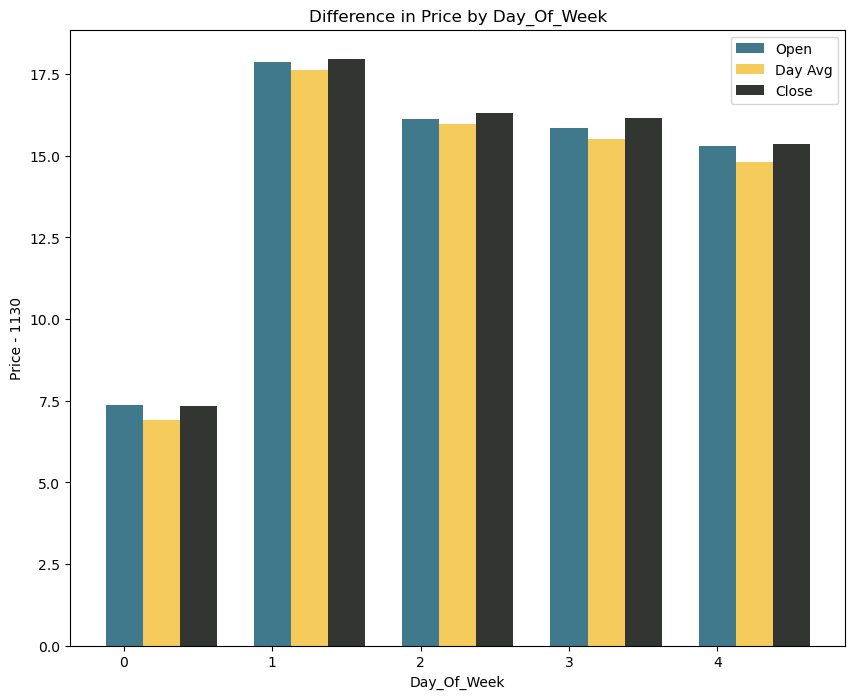

In [65]:
import numpy as np
import matplotlib.pyplot as plt

label = 'Day_Of_Week'
a = df.groupby([label]).mean()["Open"]
b = df.groupby([label]).mean()["Avg_Daily_Cost"]
c = df.groupby([label]).mean()["Close"]
fig = plt.figure(figsize = (10, 8))
width = 0.25
changey = 1130
bar1 = plt.bar(a.keys(), a - changey, width, color = '#40798C')
bar2 = plt.bar(b.keys() + width, b - changey, width, color = '#F5CB5C')
bar3 = plt.bar(c.keys() + width * 2, c - changey, width, color = '#333533')

plt.xlabel(label)
plt.ylabel("Price" + " - " + str(changey))
plt.title("Difference in Price by " + label)
plt.legend((bar1, bar2, bar3), ("Open", "Day Avg", "Close"))
plt.show()

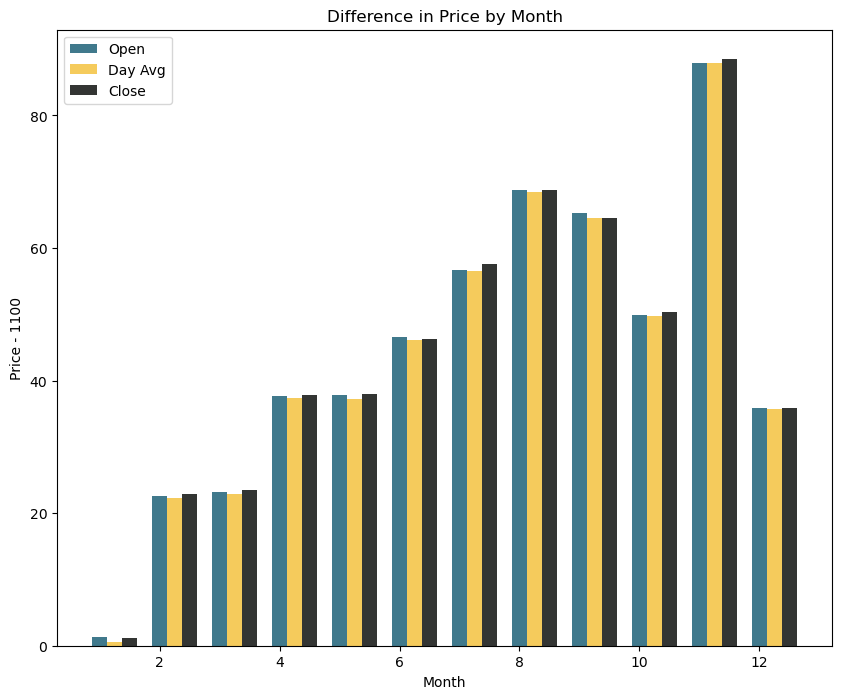

In [51]:
label = 'Month'
a = df.groupby([label]).mean()["Open"]
b = df.groupby([label]).mean()["Avg_Daily_Cost"]
c = df.groupby([label]).mean()["Close"]
fig = plt.figure(figsize = (10, 8))
width = 0.25
changey = 1100
bar1 = plt.bar(a.keys(), a - changey, width, color = '#40798C')
bar2 = plt.bar(b.keys() + width, b - changey, width, color = '#F5CB5C')
bar3 = plt.bar(c.keys() + width * 2, c - changey, width, color = '#333533')

plt.xlabel(label)
plt.ylabel("Price" + " - " + str(changey))
plt.title("Difference in Price by " + label)
plt.legend((bar1, bar2, bar3), ("Open", "Day Avg", "Close"))
plt.show()

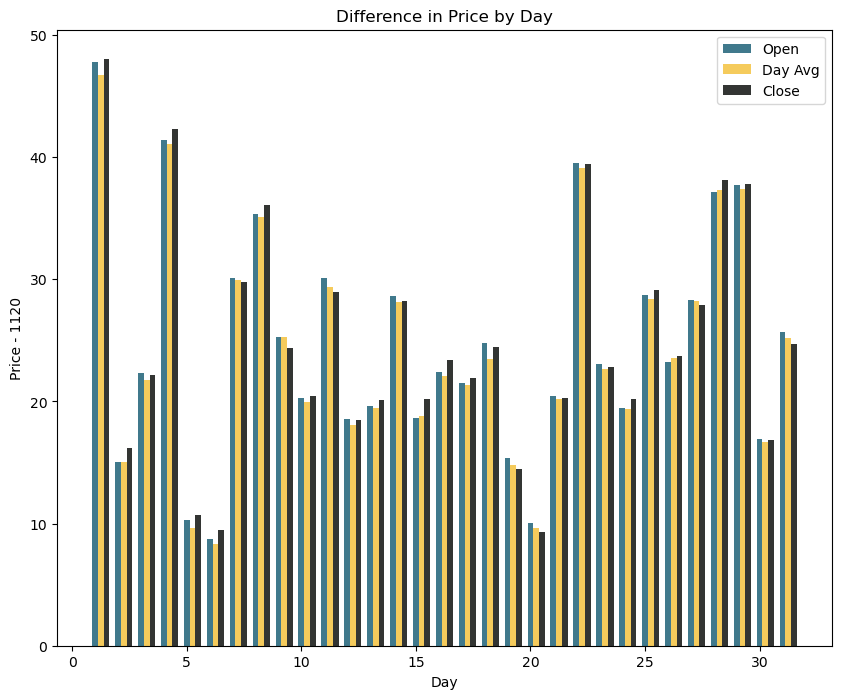

In [52]:
label = 'Day'
a = df.groupby([label]).mean()["Open"]
b = df.groupby([label]).mean()["Avg_Daily_Cost"]
c = df.groupby([label]).mean()["Close"]
fig = plt.figure(figsize = (10, 8))
width = 0.25
changey = 1120
bar1 = plt.bar(a.keys(), a - changey, width, color = '#40798C')
bar2 = plt.bar(b.keys() + width, b - changey, width, color = '#F5CB5C')
bar3 = plt.bar(c.keys() + width * 2, c - changey, width, color = '#333533')

plt.xlabel(label)
plt.ylabel("Price" + " - " + str(changey))
plt.title("Difference in Price by " + label)
plt.legend((bar1, bar2, bar3), ("Open", "Day Avg", "Close"))
plt.show()

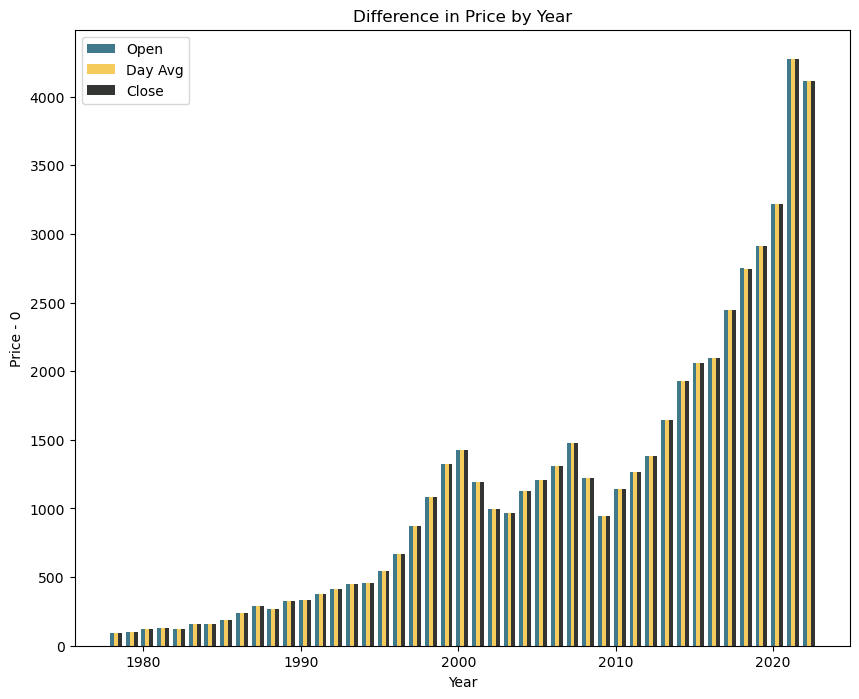

In [53]:
label = 'Year'
a = df.groupby([label]).mean()["Open"]
b = df.groupby([label]).mean()["Avg_Daily_Cost"]
c = df.groupby([label]).mean()["Close"]
fig = plt.figure(figsize = (10, 8))
width = 0.25
changey = 0
bar1 = plt.bar(a.keys(), a - changey, width, color = '#40798C')
bar2 = plt.bar(b.keys() + width, b - changey, width, color = '#F5CB5C')
bar3 = plt.bar(c.keys() + width * 2, c - changey, width, color = '#333533')

plt.xlabel(label)
plt.ylabel("Price" + " - " + str(changey))
plt.title("Difference in Price by " + label)
plt.legend((bar1, bar2, bar3), ("Open", "Day Avg", "Close"))
plt.show()